Dataset
The dataset contains the following attributes:

Row ID: Unique ID for each row.
Order ID: Unique Order ID for each Customer.
Order Date: Order Date of the product.
Ship Date: Shipping Date of the Product.
Ship Mode: Shipping Mode specified by the Customer.
Customer ID: Unique ID to identify each Customer.
Customer Name: Name of the Customer.
Segment: The segment where the Customer belongs.
Country: Country of residence of the Customer.
City: City of residence of the Customer.
State: State of residence of the Customer.
Postal Code: Postal Code of every Customer.
Region: Region where the Customer belongs.
Product ID: Unique ID of the Product.
Category: Category of the product ordered.
Sub-Category: Sub-Category of the product ordered.
Product Name: Name of the Product.
Sales: Sales of the Product.
Quantity: Quantity of the Product.
Discount: Discount provided.
Profit: Profit/Loss incurred.


Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

Which states have the most sales?
What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
Who is an outstanding customer in New York?
Are there any differences among states in profitability?
The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
What are the Top 20 customers by Sales?
Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


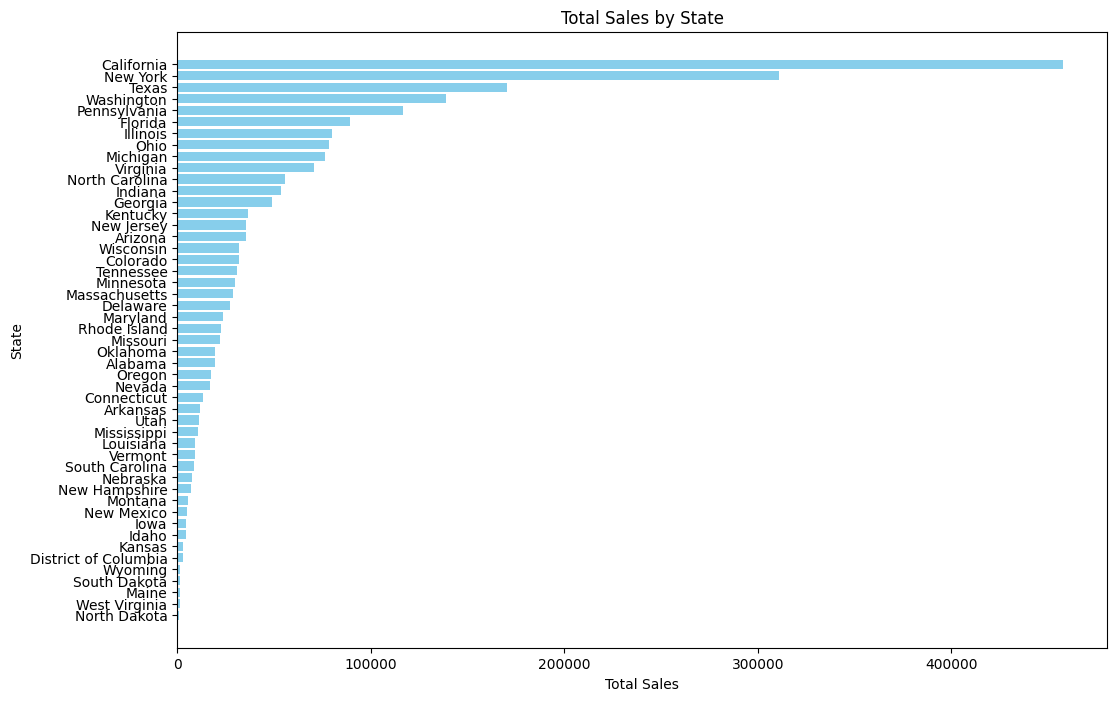

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

missing_values = data.isnull().sum()

sales_by_state = data.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(sales_by_state['State'], sales_by_state['Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.gca().invert_yaxis()
plt.show()

missing_values

 Total sales and profit between New York and California.

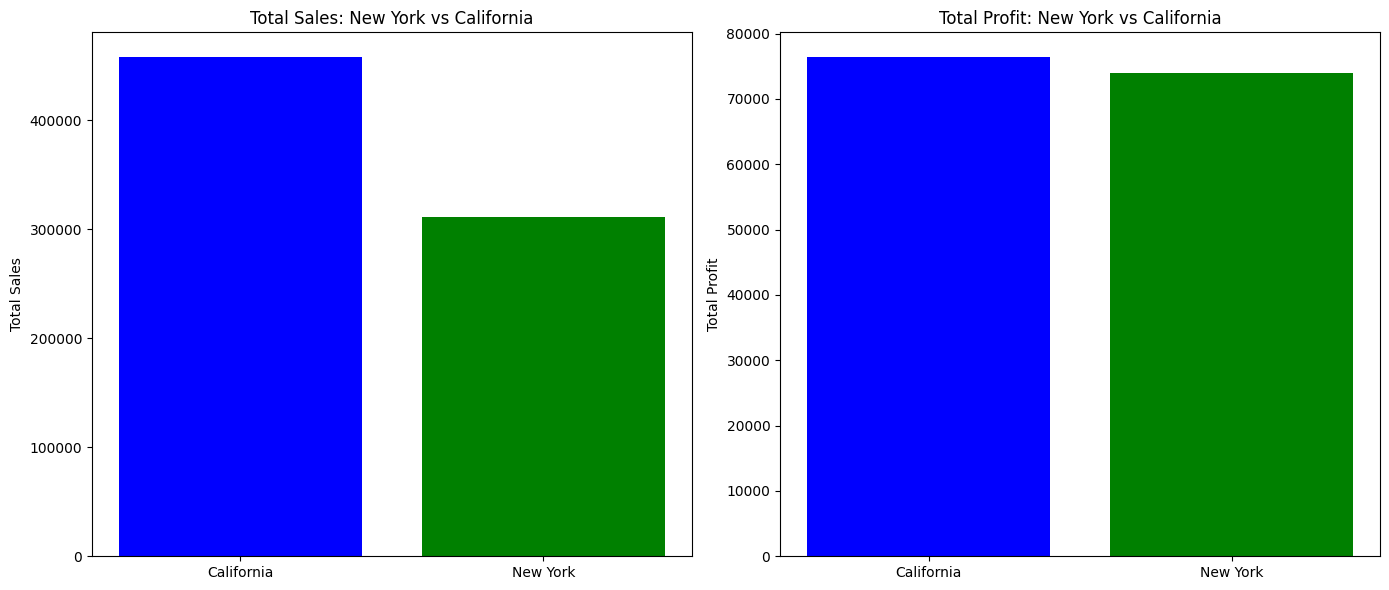

,State,Sales,Profit
0,California,457687.6315,76381.3871
1,New York,310876.2710,74038.5486


In [8]:
ny_ca_data = data[data['State'].isin(['New York', 'California'])]
ny_ca_sales_profit = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Sales comparison
ax1.bar(ny_ca_sales_profit['State'], ny_ca_sales_profit['Sales'], color=['blue', 'green'])
ax1.set_title('Total Sales: New York vs California')
ax1.set_ylabel('Total Sales')

# Profit comparison
ax2.bar(ny_ca_sales_profit['State'], ny_ca_sales_profit['Profit'], color=['blue', 'green'])
ax2.set_title('Total Profit: New York vs California')
ax2.set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

ny_ca_sales_profit

Outstanding customer


In [10]:
ny_data = data[data['State'] == 'New York']

ny_customers_sales = ny_data.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

outstanding_customer_ny = ny_customers_sales.iloc[0]

outstanding_customer_ny

,399
Customer Name,Tom Ashbrook
Sales,13723.498


Total profit by sale

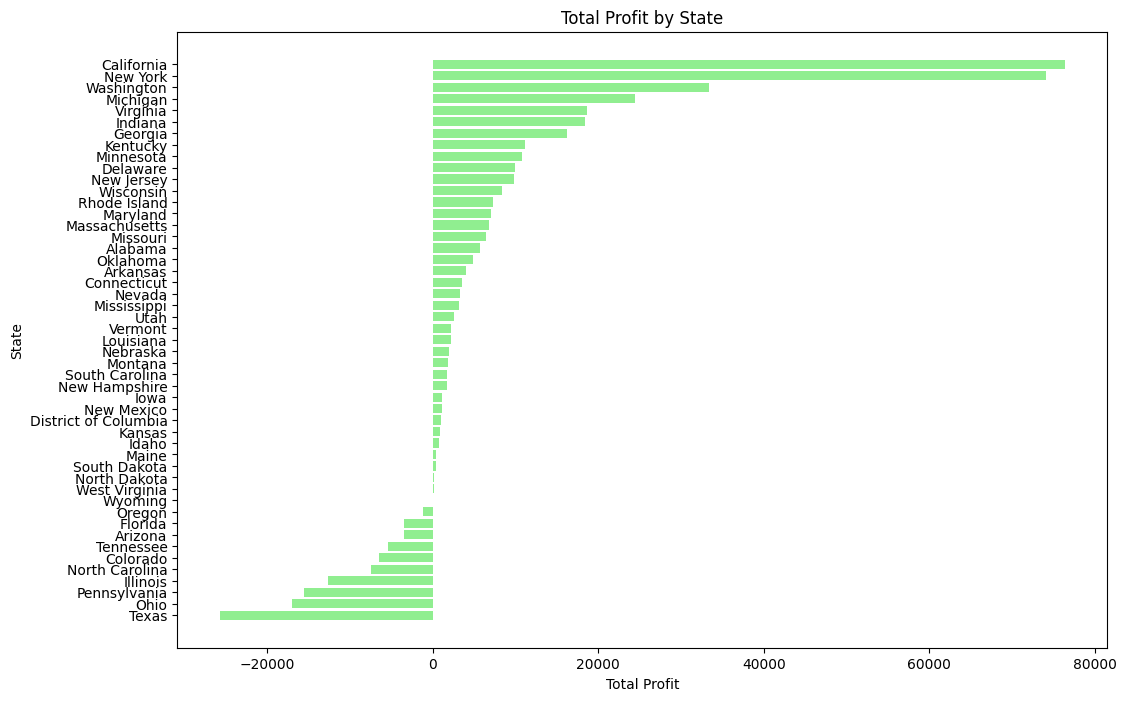

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


In [11]:
profit_by_state = data.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(profit_by_state['State'], profit_by_state['Profit'], color='lightgreen')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.title('Total Profit by State')
plt.gca().invert_yaxis()
plt.show()

profit_by_state.head(10)

In [12]:
customer_profit = data.groupby('Customer Name')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

customer_profit['Cumulative Profit'] = customer_profit['Profit'].cumsum()
total_profit = customer_profit['Profit'].sum()
customer_profit['Cumulative Percentage'] = customer_profit['Cumulative Profit'] / total_profit * 100

top_20_percent_customers = int(len(customer_profit) * 0.2)
top_20_percent_profit = customer_profit.iloc[:top_20_percent_customers]['Profit'].sum()

top_20_percent_profit_contribution = top_20_percent_profit / total_profit * 100

top_20_percent_profit_contribution

81.42587496747004

top 20 cities by sales and profit, and analyze differences in profitability among cities

In [14]:
city_sales_profit = data.groupby('City')[['Sales', 'Profit']].sum().reset_index().sort_values(by='Sales', ascending=False)

top_20_cities_sales = city_sales_profit.nlargest(20, 'Sales')
top_20_cities_profit = city_sales_profit.nlargest(20, 'Profit')

top_20_cities_sales, top_20_cities_profit

(              City        Sales      Profit
 329  New York City  256368.1610  62036.9837
 266    Los Angeles  175851.3410  30440.7579
 452        Seattle  119540.7420  29156.0967
 438  San Francisco  112669.0920  17507.3854
 374   Philadelphia  109077.0130 -13837.7674
 207        Houston   64504.7604 -10153.5485
 80         Chicago   48539.5410  -6654.5688
 437      San Diego   47521.0290   6377.1960
 216   Jacksonville   44713.1830  -2323.8350
 464    Springfield   43054.3420   6200.6974
 123        Detroit   42446.9440  13181.7908
 94        Columbus   38706.2430   5897.1013
 330         Newark   28576.1190   5793.7588
 93        Columbia   25283.3240   5606.1167
 233      Lafayette   25036.2000  10018.3876
 215        Jackson   24963.8580   7581.6828
 434    San Antonio   21843.5280  -7299.0502
 60      Burlington   21668.0820  -3622.8772
 16       Arlington   20214.5320   4169.6969
 109         Dallas   20131.9322  -2846.5257,
               City       Sales      Profit
 329  New 

 Top 20 customers by sales and plot the cumulative sales

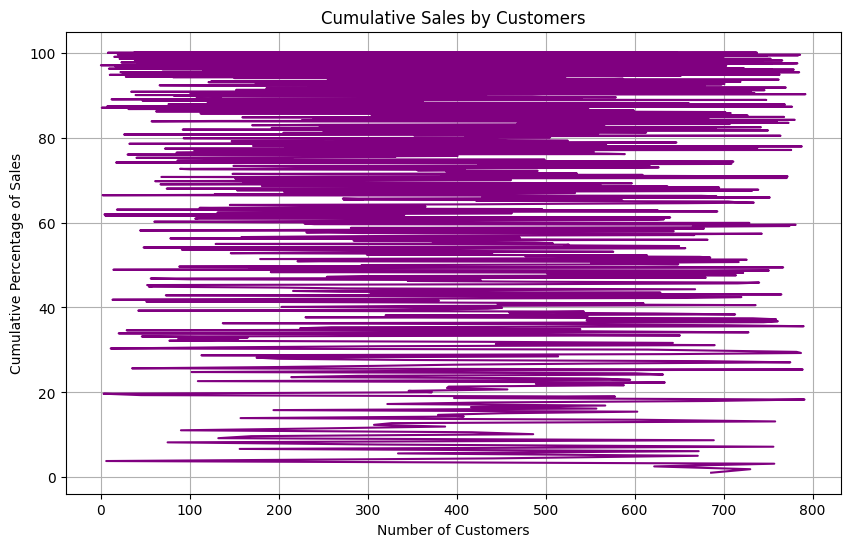

(          Customer Name      Sales
 686         Sean Miller  25043.050
 730        Tamara Chand  19052.218
 622        Raymond Buch  15117.339
 757        Tom Ashbrook  14595.620
 6         Adrian Barton  14473.571
 441        Ken Lonsdale  14175.229
 671        Sanjit Chand  14142.334
 334        Hunter Lopez  12873.298
 672        Sanjit Engle  12209.438
 156  Christopher Conant  12129.072
 756        Todd Sumrall  11891.751
 312           Greg Tran  11820.120
 75         Becky Martin  11789.630
 689         Seth Vernon  11470.950
 132     Caroline Jumper  11164.974
 169         Clay Ludtke  10880.546
 486       Maria Etezadi  10663.728
 417      Karen Ferguson  10604.266
 90         Bill Shonely  10501.653
 249        Edward Hooks  10310.880,
 47.96190899720081)

In [15]:
customer_sales = data.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

top_20_customers_sales = customer_sales.head(20)

customer_sales['Cumulative Sales'] = customer_sales['Sales'].cumsum()
total_sales = customer_sales['Sales'].sum()
customer_sales['Cumulative Percentage'] = customer_sales['Cumulative Sales'] / total_sales * 100

plt.figure(figsize=(10,6))
plt.plot(customer_sales['Cumulative Percentage'], color='purple')
plt.title('Cumulative Sales by Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.grid(True)
plt.show()

top_20_percent_customers_sales = int(len(customer_sales) * 0.2)
top_20_percent_sales = customer_sales.iloc[:top_20_percent_customers_sales]['Sales'].sum()

top_20_percent_sales_contribution = top_20_percent_sales / total_sales * 100

top_20_customers_sales, top_20_percent_sales_contribution

Based on this analysis, here are some recommendations for marketing strategies:

1.	Prioritize High-Sales States: Focus marketing efforts on states like California and New York, which are key revenue drivers.
2.	Target High-Profit Cities: Cities like New York City, Los Angeles, and Seattle generate both high sales and profit, making them strategic locations for marketing investments.
3.	Address Profitability Issues: Focus on improving profitability in cities like Philadelphia and Houston, where sales are high but profits are negative.
4.	Leverage Top Customers: Invest in personalized marketing and retention strategies for top customers, such as Sean Miller and Tom Ashbrook, who significantly contribute to the overall sales.
